In [ ]:
#import libraries
import json
import pandas as pd
from copy import deepcopy
from bs4 import BeautifulSoup
from urllib.request import urlopen

#import plotting libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

(-0.057499999999999996, 1.2075, -0.037, 0.777)

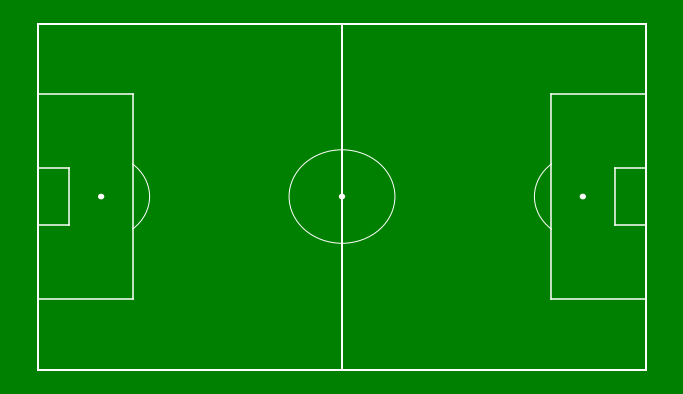

In [ ]:
#Set boundaries and mid line

x_lim = [0,1.15]
y_lim = [0,0.74]

x_mid = x_lim[1]/2
y_mid = y_lim[1]/2

#Setting color and line width

background = "Green"
Line_color = "White"
Line_width = 2.

def create_full_pitch(x_lim, y_lim, background = "Green", Line_color = "White", Line_width = "2"):

  #Create Figure
  fig = plt.figure(facecolor = background, figsize = (12,7))
  ax = fig.add_subplot(111, facecolor = background)

  #pitch outline and centre line
  plt.plot([x_lim[0],x_lim[0]], [y_lim[0],y_lim[1]], linewidth = Line_width, color = Line_color) #left goal line
  plt.plot([x_lim[0],x_lim[1]], [y_lim[1],y_lim[1]], linewidth = Line_width, color = Line_color) #upper side line
  plt.plot([x_lim[1],x_lim[1]], [y_lim[1],y_lim[0]], linewidth = Line_width, color = Line_color) #right goal line
  plt.plot([x_lim[1],x_lim[0]], [y_lim[0],y_lim[0]], linewidth = Line_width, color = Line_color) #lower side line
  plt.plot([x_mid,x_mid], [y_lim[0],y_lim[1]], linewidth = Line_width, color = Line_color) #Centre line

  #left penalty area
  plt.plot([x_lim[0]+.18, x_lim[0]+.18], [y_mid - .22, y_mid + .22], color = Line_color) 
  plt.plot([x_lim[0], x_lim[0]+.18], [y_mid + .22, y_mid + .22], color = Line_color) 
  plt.plot([x_lim[0], x_lim[0]+.18], [y_mid - .22, y_mid - .22], color = Line_color) 

  #right penalty area
  plt.plot([x_lim[1]- .18, x_lim[1]- .18], [y_mid - .22, y_mid + .22], color = Line_color) 
  plt.plot([x_lim[1], x_lim[1]- .18], [y_mid + .22, y_mid + .22], color = Line_color) 
  plt.plot([x_lim[1], x_lim[1]- .18], [y_mid - .22, y_mid - .22], color = Line_color) 

  #left 6yd box
  plt.plot([x_lim[0]+.06, x_lim[0]+.06], [y_mid - .06, y_mid + .06], color = Line_color) 
  plt.plot([x_lim[0], x_lim[0]+.06], [y_mid + .06, y_mid + .06], color = Line_color) 
  plt.plot([x_lim[0], x_lim[0]+.06], [y_mid - .06, y_mid - .06], color = Line_color) 

  #right 6yd box
  plt.plot([x_lim[1]- .06, x_lim[1]- .06], [y_mid - .06, y_mid + .06], color = Line_color) 
  plt.plot([x_lim[1], x_lim[1]- .06], [y_mid + .06, y_mid + .06], color = Line_color) 
  plt.plot([x_lim[1], x_lim[1]- .06], [y_mid - .06, y_mid - .06], color = Line_color) 

  #prepare circles
  centre_circle = plt.Circle((x_mid,y_mid), .1, color = Line_color, fill = False)
  centre_spot = plt.Circle((x_mid,y_mid), .005, color = Line_color)
  left_penalty_spot = plt.Circle((x_lim[0]+0.12, y_mid), .005, color = Line_color)
  right_penalty_spot = plt.Circle((x_lim[1]- .12, y_mid), .005, color = Line_color)

  #draw circles
  ax.add_patch(centre_circle)
  ax.add_patch(centre_spot)
  ax.add_patch(left_penalty_spot)
  ax.add_patch(right_penalty_spot)

  #prepare arcs
  left_arc = Arc((x_lim[0]+.12, y_mid), height = .183, width = .183, angle = 0, theta1 = 310, theta2 = 50, color = Line_color) 
  right_arc = Arc((x_lim[1]- .12, y_mid), height = .183, width= .183, angle = 0, theta1 = 130, theta2 = 230, color = Line_color) 

  #draw arcs
  ax.add_patch(left_arc)
  ax.add_patch(right_arc)

create_full_pitch(x_lim,y_lim)

plt.axis("off")

In [ ]:
scrape_url = "https://understat.com/player/1250"
page_connect = urlopen(scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")
page_html
json_raw_string = page_html.findAll(name="script")[3].text
json_raw_string

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2215217\\x22,\\x22minute\\x22\\x3A\\x2292\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.8230000305175781\\x22,\\x22Y\\x22\\x3A\\x220.36900001525878906\\x22,\\x22xG\\x22\\x3A\\x220.06236456334590912\\x22,\\x22player\\x22\\x3A\\x22Mohamed\\x20Salah\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x221250\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x224720\\x22,\\x22h_team\\x22\\x3A\\x22Chelsea\\x22,\\x22a_team\\x22\\x3A\\x22Swansea\\x22,\\x22h_goals\\x22\\x3A\\x224\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222014\\x2D09\\x2D13\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Eden\\x20Hazard\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2220034\\x22,\\x22minute\\x22\\x3A\\x2284\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\

In [ ]:
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")
json_data = json_raw_string[start_ind:stop_ind]
json_data

'\\x5B\\x7B\\x22id\\x22\\x3A\\x2215217\\x22,\\x22minute\\x22\\x3A\\x2292\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.8230000305175781\\x22,\\x22Y\\x22\\x3A\\x220.36900001525878906\\x22,\\x22xG\\x22\\x3A\\x220.06236456334590912\\x22,\\x22player\\x22\\x3A\\x22Mohamed\\x20Salah\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x221250\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22LeftFoot\\x22,\\x22match_id\\x22\\x3A\\x224720\\x22,\\x22h_team\\x22\\x3A\\x22Chelsea\\x22,\\x22a_team\\x22\\x3A\\x22Swansea\\x22,\\x22h_goals\\x22\\x3A\\x224\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222014\\x2D09\\x2D13\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Eden\\x20Hazard\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2220034\\x22,\\x22minute\\x22\\x3A\\x2284\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.92\\x22,\\x2

In [ ]:
json_data = json_data.encode("utf8").decode("unicode_escape")
shots_df = pd.json_normalize(json.loads(json_data))
shots_df = shots_df.apply(pd.to_numeric, errors = "ignore")
shots_df.describe().round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0,801.0
mean,267343.9,46.6,0.9,0.4,0.2,1250.0,2018.0,9328.1,1.9,1.5
std,119158.0,25.7,0.1,0.1,0.2,0.0,1.9,4810.5,1.4,1.4
min,15217.0,0.0,0.5,0.2,0.0,1250.0,2014.0,572.0,0.0,0.0
25%,158727.0,25.0,0.8,0.4,0.0,1250.0,2017.0,7162.0,1.0,0.0
50%,275110.0,48.0,0.9,0.4,0.1,1250.0,2018.0,9436.0,2.0,1.0
75%,376617.0,68.0,0.9,0.5,0.2,1250.0,2020.0,14090.0,3.0,2.0
max,451188.0,103.0,1.0,0.8,1.0,1250.0,2021.0,16578.0,7.0,7.0


(0.3959722242503725,
 1.0540277757496275,
 0.06110709737820463,
 0.8678929178805844)

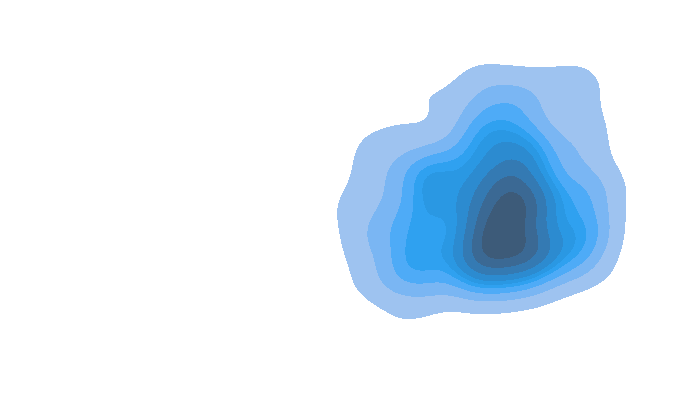

In [ ]:
plt.figure(figsize = (12,7))
sns.kdeplot(x = shots_df['X'], y = shots_df["Y"], shade = True, n_levels = 10)
plt.axis("off")

In [ ]:
#Set boundaries and mid line

x_lim = [0,1.15]
y_lim = [0,0.74]

x_mid = x_lim[1]/2
y_mid = y_lim[1]/2

#Setting color and line width

background = "Green"
Line_color = "White"
Line_width = 2

full_pitch_shots_df = deepcopy(shots_df)
full_pitch_shots_df["X"] = full_pitch_shots_df["X"].multiply(x_lim[1])
full_pitch_shots_df["Y"] = full_pitch_shots_df["Y"].multiply(y_lim[1])

(0.0, 1.15, 0.0, 0.74)

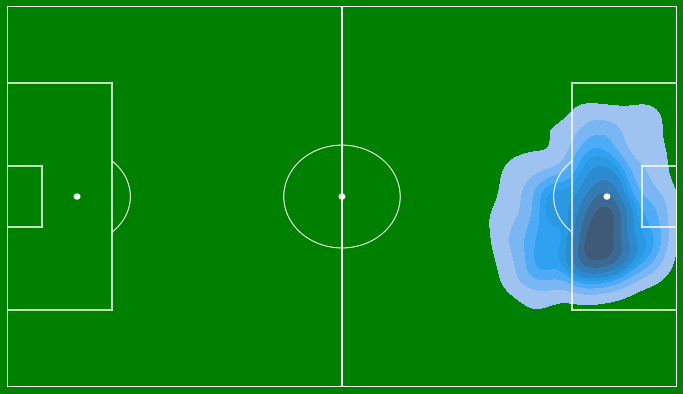

In [ ]:

#generate field image
create_full_pitch(x_lim,y_lim)

#plot the heat map
ax = sns.kdeplot(x = full_pitch_shots_df["X"], y = full_pitch_shots_df["Y"], shade=True, n_levels=10)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.axis("off")